In [260]:
import importlib
import sys

# sys.path.append('home/elias/Genetic-Algorithms/energy optimization/') #Fix this

from pprint import pprint
import numpy as np
from deap import base, creator, tools
import random

import system.GA as GA
 
import datalayer.getdata as getdata
import system.system_ as sys
import system.constraints as constraints

importlib.reload(sys)
importlib.reload(GA)
importlib.reload(getdata)
importlib.reload(constraints)



state = getdata.gen_state()
LOWER_BOUNDS, UPPER_BOUNDS, constraint = constraints.general_constraints(Glmax=max(state["load"]))

[Dmax, Glmax, Gbmax, Bmax, N_HOURS] = constraint

genome=96

In [261]:
test = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)
print(test)


[1.98708274e+01 6.73728394e+00 1.02679899e+01 1.13406840e+01
 1.80212196e+01 1.67744738e+01 2.38076362e+01 1.91292266e+01
 1.28450995e+01 6.51096063e+00 1.32674717e+01 2.28509242e+01
 1.93952482e+01 9.07556146e+00 3.45054906e+00 2.18227821e+01
 7.94410518e+00 6.94426305e+00 7.37587207e+00 7.69702209e-01
 2.65336485e+01 1.03463700e+01 2.50374241e+01 1.68394819e+01
 3.84544017e+01 5.00390676e+01 4.55685107e+01 4.38065029e+01
 3.75028492e+01 4.11848693e+01 3.98518910e+01 4.84885914e+01
 5.61686021e+01 6.22643492e+01 5.51612132e+01 4.52618974e+01
 4.83760396e+01 5.76533310e+01 6.29911897e+01 4.51752466e+01
 6.11015207e+01 6.28101640e+01 6.09063845e+01 6.55035401e+01
 3.75849140e+01 5.17874910e+01 3.52534131e+01 4.13667387e+01
 1.22905826e+01 1.74237134e+01 1.63099654e+01 1.22830010e+01
 5.65812888e+00 1.94445447e+01 1.84855948e+01 4.33601545e+00
 1.96763318e+01 3.38415333e+00 1.90521057e+01 1.06283666e+01
 7.66389713e-01 1.80192803e+01 9.01148038e-01 1.76340145e+01
 1.78159894e+01 4.242468

In [262]:
test = GA.create_population(2,96, LOWER_BOUNDS, UPPER_BOUNDS)
print(test)

[[1.53168651e+01 1.03171141e+01 2.38022451e+01 3.18611236e+00
  2.30617099e+01 2.56853441e+01 2.58577725e+01 1.26164105e+01
  2.57812001e+01 2.91054638e+01 2.79325627e+01 8.16953365e+00
  1.29081991e+01 6.63345060e+00 2.59660293e+01 2.92527391e+01
  1.65547630e+01 1.04773472e+01 4.64947201e+00 6.92891500e+00
  1.18216914e+01 1.13736844e+01 4.12666705e+00 1.78458909e+01
  4.30083639e+01 4.64592375e+01 3.20342555e+01 5.19610746e+01
  3.24623590e+01 3.22739990e+01 3.78017547e+01 5.50014075e+01
  4.32325015e+01 3.96698461e+01 4.04961222e+01 5.99432880e+01
  5.48630887e+01 6.00954418e+01 4.04757095e+01 3.77452896e+01
  5.24908629e+01 5.92770798e+01 6.36327846e+01 5.93443273e+01
  5.22968711e+01 5.07601766e+01 5.61641701e+01 4.03603297e+01
  1.78332762e-01 1.36092166e+01 3.75934043e+00 1.36753188e+01
  9.77647696e+00 2.94319668e+00 1.58343171e+01 2.02803158e+00
  1.71640151e+01 7.55656947e-02 1.93613352e+01 1.20535770e+00
  6.49708427e+00 4.00357132e+00 4.38160381e+00 2.67889026e-01
  1.4570

In [263]:
state["time"] = state["time"].dt.strftime("%Y-%m-%d %H:%M")
print(state)

                time  spotprice  irradiance       load
0   2025-12-15 00:00      24.47        0.00  58.325229
1   2025-12-15 01:00      23.54        0.00  56.776352
2   2025-12-15 02:00      21.33        0.00  55.836501
3   2025-12-15 03:00      19.61        0.00  55.147187
4   2025-12-15 04:00      18.39        0.00  55.524069
5   2025-12-15 05:00      21.42        0.00  57.959343
6   2025-12-15 06:00      27.61        0.00  63.659527
7   2025-12-15 07:00      38.81        0.01  67.617818
8   2025-12-15 08:00      44.65        1.66  69.013702
9   2025-12-15 09:00      43.73       11.98  68.775310
10  2025-12-15 10:00      43.60       30.46  68.428685
11  2025-12-15 11:00      44.56       46.58  68.112822
12  2025-12-15 12:00      45.85       59.39  67.771288
13  2025-12-15 13:00      46.98       46.87  66.728892
14  2025-12-15 14:00      46.34        8.22  66.441739
15  2025-12-15 15:00      47.00        0.44  66.998029
16  2025-12-15 16:00      47.93        0.00  69.045626
17  2025-1

In [264]:
individual = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)
D, Gb, Gl, g = GA.unpack(individual)

N_HOURS = 24

B = np.zeros(N_HOURS + 1)

for t in range(N_HOURS):
    print(sys.solar_gen(t, state))
    B[t + 1] = B[t] - D[t] + g[t]*sys.solar_gen(t, state) + Gb[t]

    if not constraints.battery_constraints(t, D, B, Bmax):
        print(False)


#test = sys.battery_sim(D,Gb,g, state, Bmax=100, N_HOURS=24)

0.0
0.0
False
0.0
False
0.0
False
0.0
0.0
0.0
2.9999999999999997e-05
0.004979999999999999
0.03594
0.09137999999999999
0.13974
0.17817000000000002
0.14060999999999998
0.024660000000000005
0.00132
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [265]:



population = GA.create_population(100,96, LOWER_BOUNDS, UPPER_BOUNDS)


x_dim, y_dim = population.shape

D, Gl, Gb, g = GA.unpack(population[0,:])
print(Gl)


x = GA.fitness(population[0,:], state, LOWER_BOUNDS, UPPER_BOUNDS, constraint)

print(x)

[48.03179979 37.65979323 32.20784632 47.09258923 38.41352866 48.53229637
 46.45260143 59.29902598 57.71822036 66.12756201 58.90826833 46.96009669
 39.64181813 53.2197877  45.59183276 51.15217142 66.53173558 52.73289105
 54.6947299  61.30159051 39.73940983 56.9580147  41.6927461  37.32803794]
(np.float64(58689.9936280988),)


In [266]:
toolbox = base.Toolbox()



# Fitness: minimize cost ⇒ weight = -1.0
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Individual = list with attached fitness
creator.create("Individual", list, fitness=creator.FitnessMin)

/home/elias/.conda/envs/ga/lib/python3.14/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/elias/.conda/envs/ga/lib/python3.14/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [267]:


population_dp = [creator.Individual(ind.tolist()) for ind in population]

# Register the evaluation function
toolbox.register("evaluate", GA.fitness, state=state, LOWER_BOUNDS=LOWER_BOUNDS, UPPER_BOUNDS=UPPER_BOUNDS, constraint=constraint)


# Tournament selection (tournsize = 3 is typical)
toolbox.register("select", tools.selTournament, tournsize=3)

offspring = toolbox.select(population_dp, len(population_dp))
offspring = list(map(toolbox.clone, offspring))



In [268]:
toolbox.register("mate", tools.cxBlend, alpha=0.3)

CXPB = 0.9  # crossover probability

# Inside the GA evolution loop:
for i in range(1, len(offspring), 2):
    if random.random() < CXPB:
        toolbox.mate(offspring[i-1], offspring[i])

In [269]:
toolbox.register(
    "mutate",
    tools.mutPolynomialBounded,
    low=list(LOWER_BOUNDS),
    up=list(UPPER_BOUNDS),
    eta=20,
    indpb=0.05
)

MUTPB = 0.2

for mutant in offspring:
    if random.random() < MUTPB:
        toolbox.mutate(mutant)
        del mutant.fitness.values

In [270]:
POP_SIZE = 100
MAX_GEN = 2500

population = GA.create_population(POP_SIZE,96, LOWER_BOUNDS, UPPER_BOUNDS)
population_dp = [creator.Individual(ind.tolist()) for ind in population]
population = population_dp

pprint(population[:5])  # Print first 5 individuals to inspect


[[11.909128612809884,
  23.82346494674871,
  24.225054957730684,
  12.76370910431121,
  5.2763385512252245,
  19.71057994185212,
  22.395940068471454,
  12.714762360857366,
  3.039460394851167,
  13.775285474114996,
  27.879101092421863,
  21.72881679692825,
  24.636535194551442,
  25.35433851940602,
  24.25112259404755,
  20.908957151769545,
  7.520076830260024,
  19.379826323785284,
  16.74478337559737,
  5.352608857637097,
  9.898999757430607,
  10.31287034121633,
  2.223498280485662,
  5.857791003672739,
  46.416100420523456,
  32.95288659075129,
  31.61144560060265,
  42.383477879022124,
  50.24773027794144,
  38.24876315814788,
  41.263587085695214,
  54.90305562664264,
  65.97424126348217,
  55.000024375885005,
  40.54958376174481,
  46.38400486140508,
  43.13475259294856,
  41.37455392226065,
  42.19061615595245,
  46.08907153156379,
  61.52554908640664,
  50.37460071371471,
  51.53747323273596,
  60.920633421529566,
  54.21956272173606,
  51.820990625450335,
  58.0673388403476

In [271]:
fitness_history = []

for gen in range(MAX_GEN):

    # --- SELECTION ---
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # --- CROSSOVER ---
    for i in range(1, len(offspring), 2):
        if random.random() < CXPB:
            toolbox.mate(offspring[i-1], offspring[i])
            del offspring[i-1].fitness.values
            del offspring[i].fitness.values

    # --- MUTATION ---
    for ind in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(ind)
            del ind.fitness.values

    # --- EVALUATE IF NEEDED ---
    invalid = [ind for ind in offspring if not ind.fitness.valid]
    for ind in invalid:
        ind.fitness.values = toolbox.evaluate(ind)

    # --- ELITIST REPLACEMENT (μ + λ) ---
    population = tools.selBest(population + offspring, POP_SIZE)

    best = tools.selBest(population, 1)[0]
    best_fitness = best.fitness.values[0]
    fitness_history.append(best_fitness)

    # print progress
    print(f"Gen {gen}: Best = {best_fitness}")


Gen 0: Best = 56426.42947362586
Gen 1: Best = 56426.42947362586
Gen 2: Best = 56426.42947362586
Gen 3: Best = 56426.42947362586
Gen 4: Best = 56426.42947362586
Gen 5: Best = 56406.35901110621
Gen 6: Best = 56406.35901110621
Gen 7: Best = 56406.35901110621
Gen 8: Best = 56406.35901110621
Gen 9: Best = 56396.42191184111
Gen 10: Best = 56388.05818014978
Gen 11: Best = 56327.13962492107
Gen 12: Best = 56310.20350496872
Gen 13: Best = 56270.839004734335
Gen 14: Best = 56188.58334039533
Gen 15: Best = 56185.29705953339
Gen 16: Best = 56150.668997664245
Gen 17: Best = 56086.8692678816
Gen 18: Best = 56086.8692678816
Gen 19: Best = 56044.324822473995
Gen 20: Best = 55972.62655603861
Gen 21: Best = 55879.80235716013
Gen 22: Best = 55810.81232708582
Gen 23: Best = 55810.81232708582
Gen 24: Best = 55621.83365756349
Gen 25: Best = 55621.83365756349
Gen 26: Best = 55532.880382851545
Gen 27: Best = 55443.54562517612
Gen 28: Best = 55427.28757159468
Gen 29: Best = 55297.7124538734
Gen 30: Best = 5524

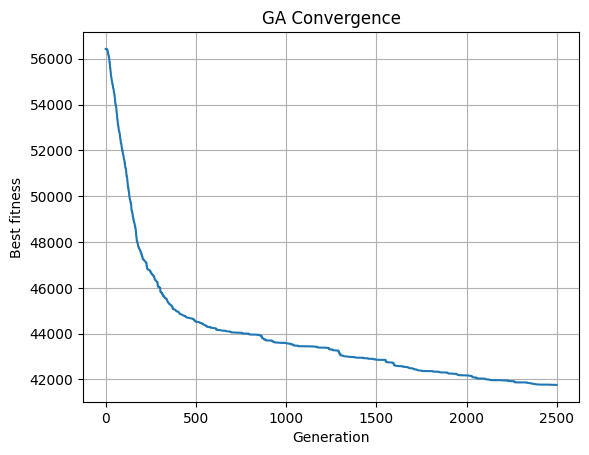

In [273]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best fitness")
plt.title("GA Convergence")
plt.grid(True)
plt.show()

In [275]:
best = tools.selBest(population, 1)[0]
def extract_variables(best_individual):
    D     = np.array(best_individual[0:N_HOURS])
    Gb    = np.array(best_individual[N_HOURS:2*N_HOURS])
    Gl    = np.array(best_individual[2*N_HOURS:3*N_HOURS])
    gamma = np.array(best_individual[3*N_HOURS:4*N_HOURS])
    return D, Gl, Gb, gamma

D_opt, Gb_opt, Gl_opt, gamma_opt = extract_variables(best)

print("Optimal Battery Discharge D(t):", D_opt)
print("Optimal Grid-to-Load Gl(t):", Gl_opt)
print("Optimal Grid-to-Battery Gb(t):", Gb_opt)
print("Optimal Renewable Fraction γ(t):", gamma_opt)



Optimal Battery Discharge D(t): [23.34185653 15.59405985 18.43743922 18.09441116 21.30245806  7.68357546
 15.99986541 29.85250589 29.98761555 30.         25.0734528  21.27830163
 24.21647922  9.58135601 22.89770258 27.75196931 24.20417291 10.55850572
 29.97642277  7.43125815  9.29378155 15.14994996 24.2550282  14.19099575]
Optimal Grid-to-Load Gl(t): [34.30699458 40.3742935  36.80378329 36.17039798 33.22179604 49.28012672
 47.06256613 36.894407   38.16270231 37.7754966  42.36372957 45.84828652
 42.83011163 56.42886191 42.54434773 38.28612714 44.06858457 58.28533364
 37.35121343 57.98347734 53.87034762 46.24511728 35.0517637  43.06655706]
Optimal Grid-to-Battery Gb(t): [1.14437159e-04 6.81675132e-05 4.32735537e-05 6.28925253e-04
 8.62112879e-05 5.43294405e-03 1.59907873e-04 5.20188963e-05
 3.21029988e-05 1.82190655e-04 4.98097597e-05 1.08286393e-05
 3.95882140e-05 1.70722596e-04 6.47495315e-05 9.58726559e-05
 7.73017552e-05 4.48744902e-05 7.21804819e-05 1.24201384e-05
 7.40749457e-05 8.

In [325]:


print(GA.fitness(np.concatenate([D_opt, Gl_opt, Gb_opt, gamma_opt]), state, LOWER_BOUNDS, UPPER_BOUNDS, constraint))


indi = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)

D, Gl, Gb, g = GA.unpack(indi)

print(D)

def battery_sim(D,Gb,g, state, B_0=0, Bmax=100, N_HOURS=24):
    B = np.zeros(N_HOURS + 1)
    B[0] = B_0

    for t in range(N_HOURS):
        B[t + 1] = B[t] - D[t] + g[t]*sys.solar_gen(t, state) + Gb[t]
        
        if not (B[t] > D[t] or B[t] > Bmax):
            return False, B
        

    return True, B

print(battery_sim(D,Gb,g, state))

(np.float64(41760.88785529785),)
[23.67930944  6.09487693 12.55967454 14.72122225 18.44167496 23.76392578
 22.81911436 23.57624657  6.27176538 13.85338852 26.49999013 16.69070318
 23.49512149 11.21588916 27.72811015  7.81060751  0.99133132  8.36440837
 26.21044366 28.28547961  4.00279914 22.89262206 13.76894106  4.73395704]
(False, array([ 0.        , -9.69025366,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ]))


In [ ]:
t = 0

indi = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)



D, Gl, Gb, g = GA.unpack(indi)

print(D)
print(Gl)
#print(state["load"])

def load_constraints(t, D, Gl, state):
    # Load (t) = Gl(t) + D(t)
    # print(Gl[t] + D[t] - state["load"].iloc[t])
    return abs(Gl[t] + D[t] - state["load"].iloc[t]) < 1

for t in range(len(D_opt)):

    if not load_constraints(t, D, Gl, state):
        print(False)
    



load = state["load"].iloc[t]
print(load)



[ 7.20286122 10.99345917  1.72751426 20.13273336  9.64018524  2.02502844
 28.35121351 16.28105992  7.79423671 27.77291409  1.73812769  1.14886918
 21.56085028 28.2509022   6.40509     7.14809124  9.19250936  3.2624965
 16.94798183 23.3440766  24.70680197 26.96720414 18.4538519   7.37729788]
[51.12236781 45.78289237 54.1089863  35.01445363 45.88388359 55.93431466
 35.30831365 51.33675806 61.21946495 41.00239576 66.69055716 66.96395248
 46.21043751 38.47799024 60.03664875 59.84993745 59.85311656 66.49193054
 51.33427478 42.92916568 39.4117605  35.16665683 41.83698522 50.82892272]
58.2062206


In [274]:
importlib.reload(GA)

indi = GA.create_individual(LOWER_BOUNDS, UPPER_BOUNDS)

# print(GA.fitness(individual, state, LOWER_BOUNDS, UPPER_BOUNDS, constraint))


D, Gl, Gb, g = GA.unpack(indi)

print(D)
print(Gl)

for t in range(len(D_opt)):

    if not load_constraints(t, D, Gl, state):
        print(False)
    else:
        print(True)



[ 8.31995314 10.0723414  19.37815679 17.28016404 16.80132097 21.05363554
 23.07348059 29.73427974 30.         11.52531554 30.         16.31808894
  4.7053845  17.74324323  2.79239566  2.79347566 11.34957093 18.37780701
 24.58100545 15.03274756  0.80785929 13.11930073 20.82612332  1.07676536]
[50.0052759  46.70401014 36.45834377 37.86702294 38.72274786 36.90570756
 40.58604656 37.88353824 38.58161615 57.24999431 38.25843668 51.79473272
 63.06590329 48.98564921 63.64934309 64.20455303 57.69605499 51.37662003
 43.70125116 51.24049472 63.31070319 49.01456023 39.4647138  57.12945524]
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
